# Representing three channel (RGB) colour using two colour channels (YB) and the time domain.
## Three-color vision
Individuals with normal vision have three distinct types of light-detecting cells in their retina, in addition to the rods, which are most active in low-light, and will not be discussed here. The retina processes the output of these cells before it reaches the brain. One of the steps in this processing is called the color [opponent process](https://en.wikipedia.org/wiki/Opponent_process), in which color is measured in terms of its red/green-ness and yellow/blue-ness. Yellowness is calculated by the retina as the sum of redness and greenness, which is contrasted with  blueness forming a yellow-blue "channel". Redness is similarly contrasted with greenness to produce a second red-green channel. This forms the two-dimensional colorspace which individuals with normal color vision perceive.

## Red-green colorblindness
Individuals with [red-green color blindness](https://en.wikipedia.org/wiki/Color_blindness#Red%E2%80%93green_color_blindness) are missing either the red or the green cone cell type. The spectral response of the long (L) wavelength red cones and medium (M) are close to each other, and as a result, the lack of either one produces a very similar effect. The retina uses the one remaining cone as a sort of yellow cone, and the short (S) wavelength blue cone functions as usual. This leaves the individual with a one-dimensional yellow-blue colorspace only.

![Spectral Response Curves](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Cones_SMJ2_E.svg/635px-Cones_SMJ2_E.svg.png)
*Vanessaezekowitz at en.wikipedia [GFDL (http://www.gnu.org/copyleft/fdl.html), CC BY 3.0-2.5-2.0-1.0 (http://creativecommons.org/licenses/by/3.0-2.5-2.0-1.0) or CC BY-SA 3.0 (https://creativecommons.org/licenses/by-sa/3.0)], via Wikimedia Commons*

## What does it look like?
While it is impossible for someone with normal color-vision to know for sure what an individual with red-green color blindness sees, we can come reasonably close by taking a three-color (RGB) image and replacing both the red and green channels with the average of the two. This makes it impossible to differentiate the degree of red/green-ness of a pixel. Matrix multiplication is the simplest approach to this, where each pixel is a vector with three components corresponding to the red, green and blue-ness of the image. Multiplying this vector by a three-by-three matrix allows any arbitrary linear recombination of these components into a new vector.

In [1]:
# Import the required libraries
%matplotlib inline
import imageio
import cycler
import math
import numpy
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Import the test image
im=imageio.imread('crayons.jpeg')
im=im.astype(float)
im=im/256.0

# Matrix to convert to yellow-blue colorspace
m_yb=numpy.array([[0.5,0.5,0.0],
                  [0.5,0.5,0.0],
                  [0.0,0.0,1.0]])

# Multiply each pixel by above matrix, and export image
im_yb=numpy.matmul(im,m_yb)
imageio.imwrite('test_yb.jpg',im_yb)

![RGB](crayons.jpeg)
*Original Image (From [pexels.com](http://www.pexels.com) under CC0 license, no photographer listed)*

![YB](test_yb.jpg)
*Yellow-Blue*

It is clear from the above images that it is impossible to discriminate the red-green dimension of hue in the right image, whereas the yellow-blue dimension is fully discriminable.

## Making the unseen seen
There are two independant axes in normal trichromatic vision. The first is the yellow-blue (YB) axis, and the second is the red-green (RG) axis. The above image on the bottom represents the YB axis of the original image on the top. One of the axes has been stripped from the image, and the resulting image is what a person with red-green color blindness would see. One way of adding the unseen axis back in is to use yellows and blues as proxies for reds and greens. Since both blues and greens appear [*cool*](https://en.wikipedia.org/wiki/Color_theory#Warm_vs._cool_colors), and reds and yellows both appear [*warm*](https://en.wikipedia.org/wiki/Color_theory#Warm_vs._cool_colors), it makes the most sense to use yellows to represent reds, and blues to represent greens. As above, matrix multiplication can be used to acheive this result:

In [2]:
# A matrix to extract RG axis
m_rg=numpy.array([[1,0,0.5],
                  [0,1,0.5],
                  [0,0,0  ]])

# A matrix to rotate RG to YB
m_rg_yb=numpy.array([[0.75,0.75,0],
                     [0.25,0.25,1],
                     [0   ,0   ,0]])

# Create two images of this effect from the test image
im_rg=numpy.matmul(im,m_rg)
im_rg_yb=numpy.matmul(im,m_rg_yb)
imageio.imwrite('test_rg.jpg',im_rg)
imageio.imwrite('test_rg_yb.jpg',im_rg_yb)

![RG](test_rg.jpg)
*Red-Green*

![RGYB](test_rg_yb.jpg)
*Red-Green represented using yellows and blues*

## Using time domain to display both axes
It is trivial to fully represent reds and greens to a person with RG color blindness, but at the expense of the original yellows and blues, so how do we show both? One possibility is to use the time domain. I will overlay the YB image and the red-green-to-yellow-blue (RGYB) image using a function I will call $h(t)$ which represents the contribution of the alternate, rotated RG image as a function of time. The final image $I_{final}$ will be $I_{final} = h(t) \cdot I_{RGYB} + (1-h(t)) \cdot I_{YB}$. The requirements for $h(t)$ are that it must be normalized (have a range from 0 to 1), and it ought to be asymmetrical (there does not exist a $t'$ such that $h(t) = 1-h(t+t')$) so the two modes can be told apart. After some experimentation, $h(t)=sin^{4} (\frac{\pi t}{T})$, where $T$ is the time period over which it repeats, produces a nice looking result.

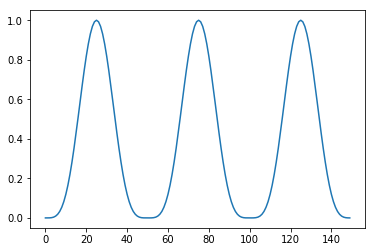

In [3]:
T=1.0 # period in seconds

# Mixing function
def h(t):
    return math.sin(math.pi*t/T)**4

# Plot the function
h_values=[h(t) for t in numpy.arange(0,3*T,0.02)]
p=plt.plot(h_values)

In [4]:
# Create an animation using the test image and the above mixing function
with imageio.get_writer("test_ybt.gif", fps=30) as f:
    for t in numpy.arange(0,T,1.0/30.0):
        frame_rotate=h(t)*im_rg_yb+(1-h(t))*im_yb
        f.append_data(frame_rotate)

![Yellow-Blue-Time](test_ybt.gif)
*Final image, combining YB with RG represented as YB*